## Import Necessary Modules

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import cv2

import IPython.display as ipd
from IPython.display import display, Image
from tqdm.notebook import tqdm

from PIL import Image


#Other necessary libraries

# import tensorflow as tf
# import cvlib as cv
# from cvlib.object_detection import draw_bbox
# from playsound import playsound

## Play Necessary Video

In [14]:
## Load and Play the video
ipd.Video("training-video-001.mp4", width=700, height=400) 

### Open the Video and Read Metadata

In [29]:
# Load Video Capture
cap = cv2.VideoCapture("training-video-001.mp4")
#Extracting the number of frames in the video
number_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
#Extract the height of the video
height_of_video = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#Extract the width of the video
width_of_video = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#Extract Frame Rate of the video
frame_rate = cap.get(cv2.CAP_PROP_FPS)

print(f"Height of the Video: {height_of_video} ")
print(f"Width of the Video: {width_of_video}")
print(f"Number of Frames in the Video: {number_of_frames}")
print(f"FPS of the Video: {frame_rate}")

Height of the Video: 1080.0 
Width of the Video: 1920.0
Number of Frames in the Video: 1208.0
FPS of the Video: 29.97002997002997


In [48]:
cap.release()

## Pulling Images from the Video

In [32]:
cap = cv2.VideoCapture("training-video-001.mp4")
ret, image = cap.read()
print(f"Returned {ret} and the shape of the image is {image.shape}")

Returned True and the shape of the image is (1080, 1920, 3)


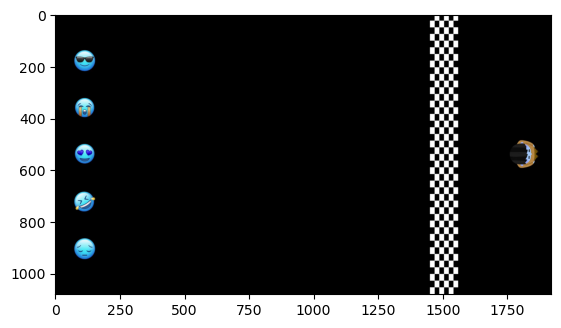

In [33]:
plt.imshow(image)
plt.show()

## Display the image in RGB format

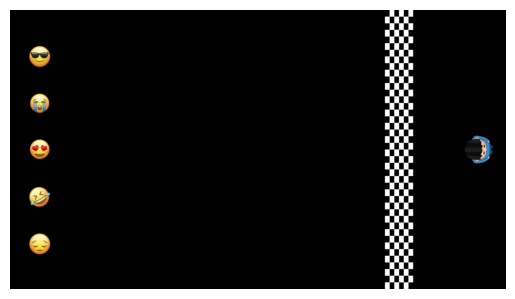

In [37]:
def display_image(image):
    '''This function is used to display the image in RGB format'''
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Now Display the Image in RGB Format
display_image(image)

In [50]:
cap.release()

## Displaying Multiple Frames from a Video

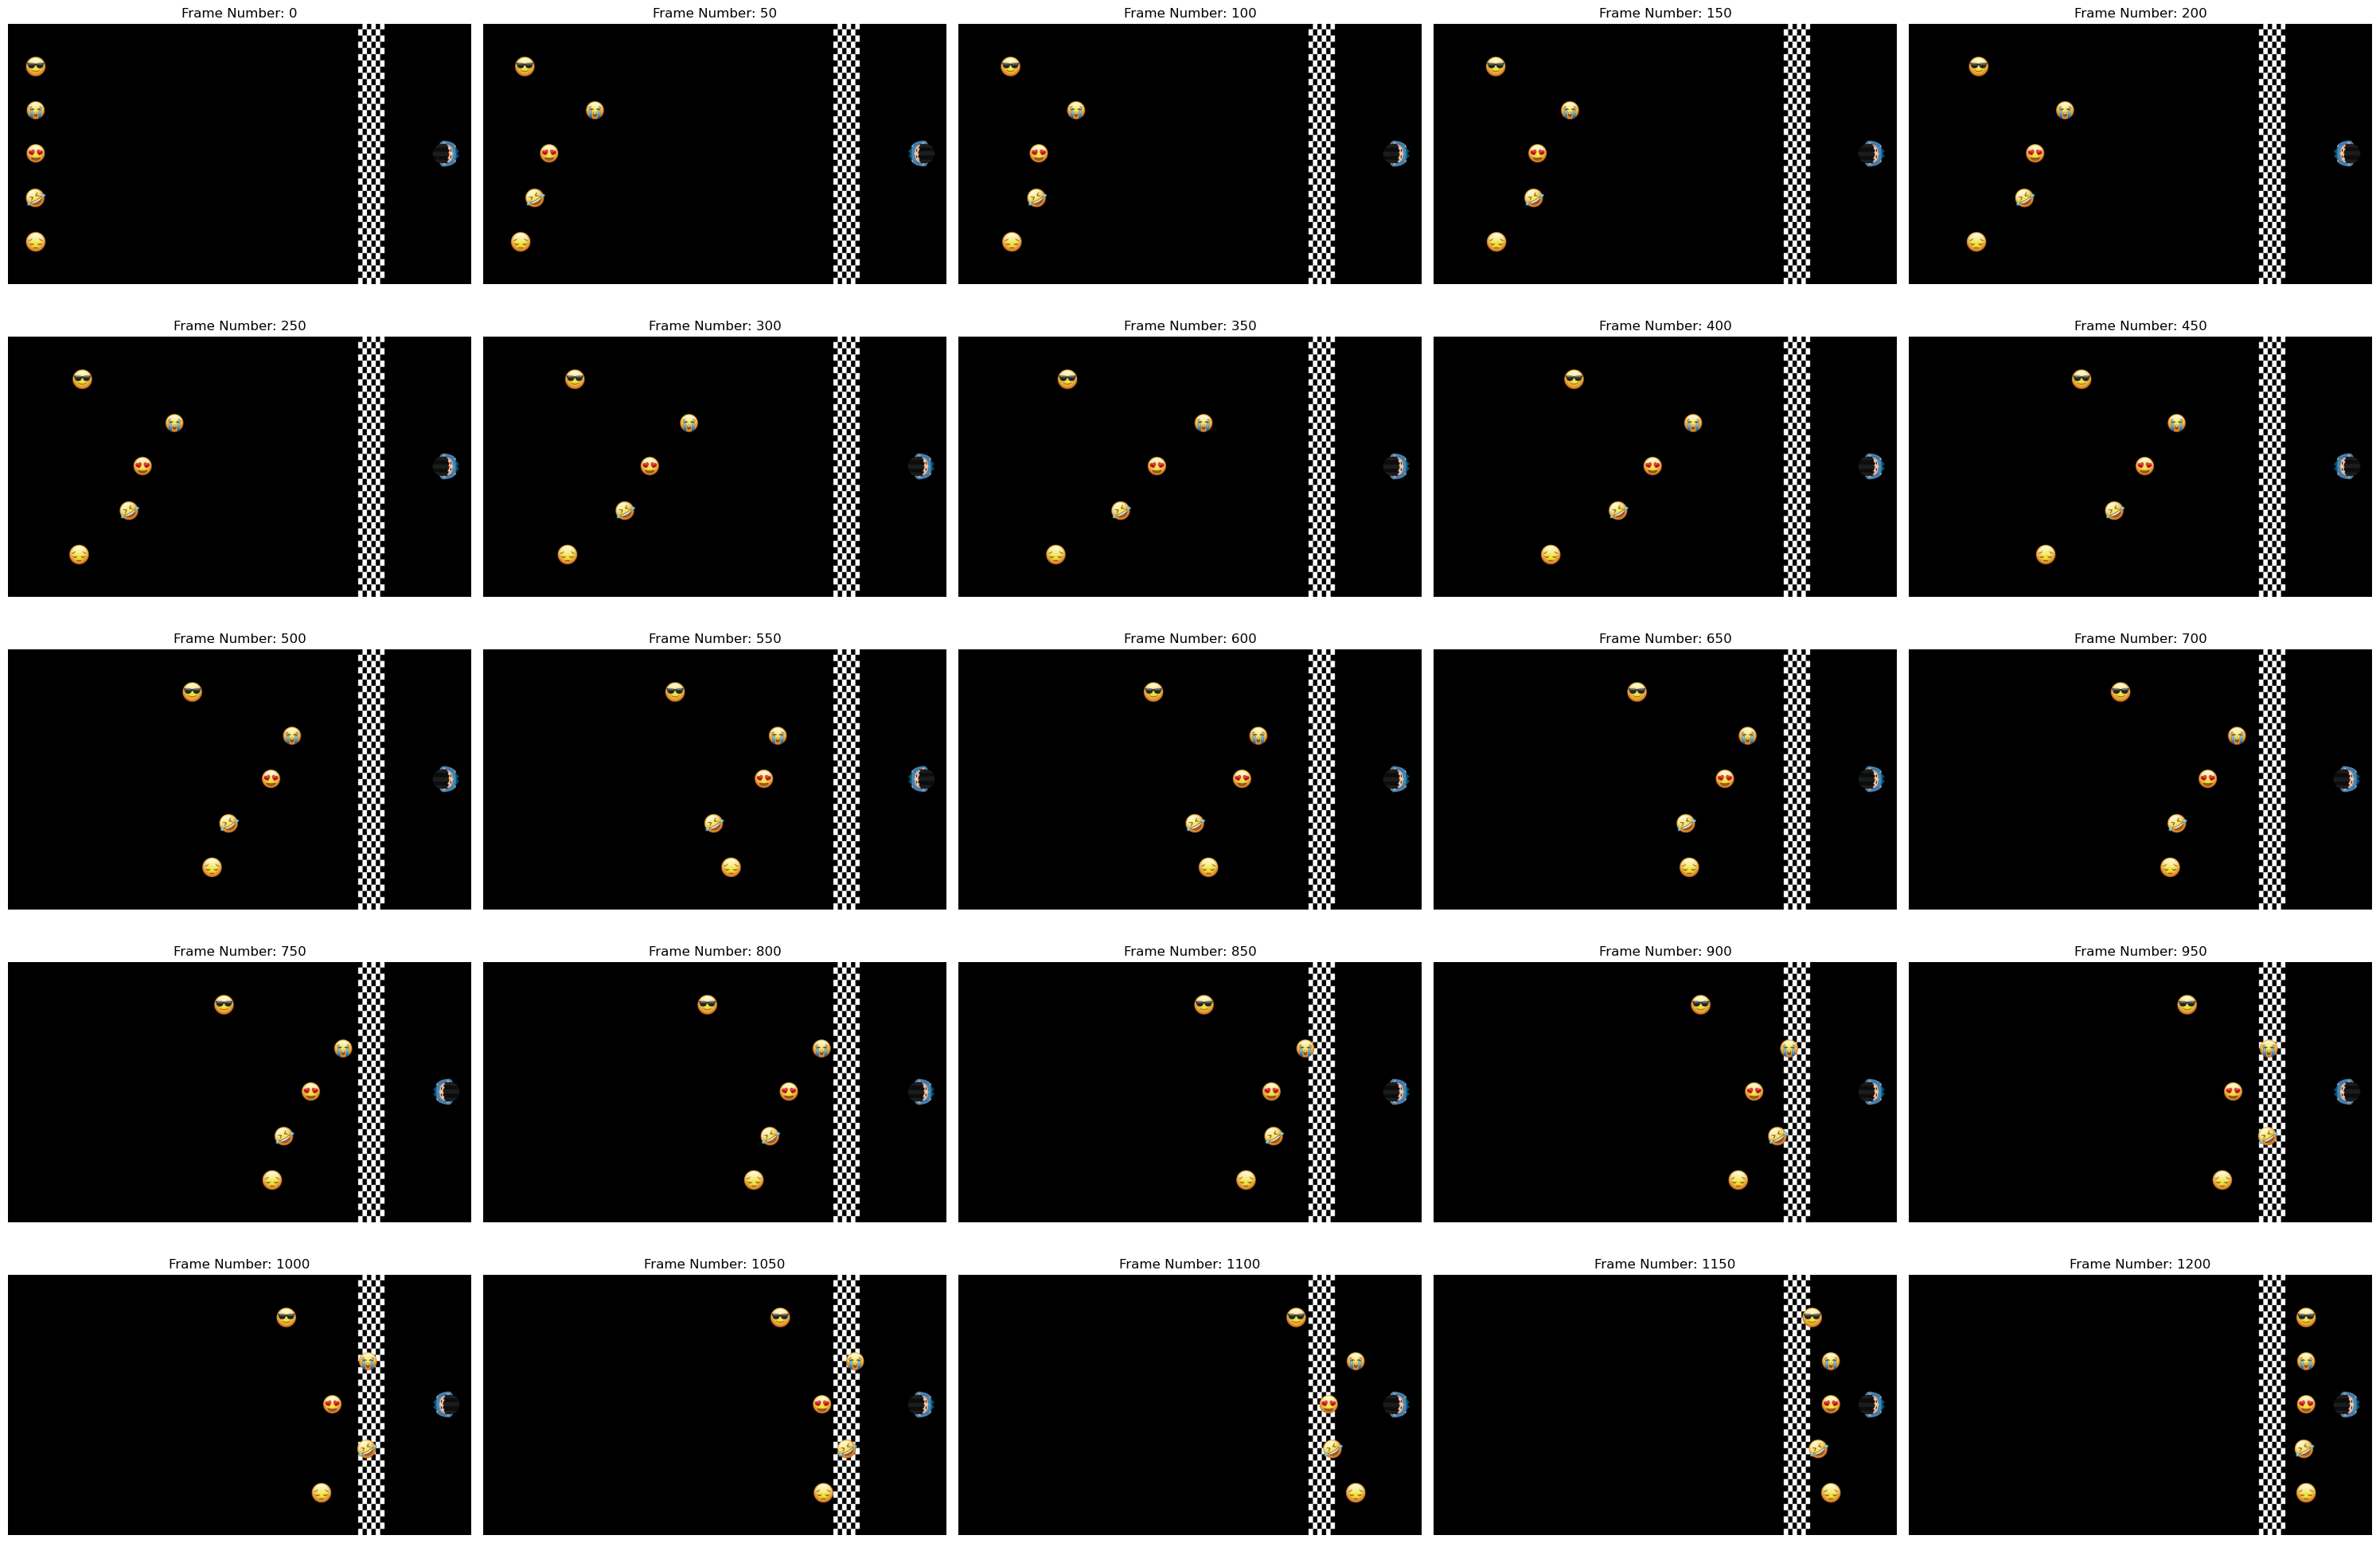

In [66]:
fig, axes = plt.subplots(5, 5, figsize=(30, 20))
axes = axes.ravel()

cap = cv2.VideoCapture("training-video-001.mp4")
number_of_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

image_idx = 0
for k in range(number_of_frames):
    ret, image = cap.read()
    if not ret:
        break
    if k % 50 == 0:
        axes[image_idx].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[image_idx].axis("off")
        axes[image_idx].set_title(f"Frame Number: {k}")
        image_idx += 1 
plt.tight_layout()
plt.show()

In [76]:
##Extracting the frames from the video
import os

# Create a directory to save the frames
output_dir = 'video_frames'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the video
cap = cv2.VideoCapture('training-video-001.mp4')

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Save each frame as an image
    frame_path = os.path.join(output_dir, f'frame_{frame_count:04d}.jpg')
    cv2.imwrite(frame_path, frame)
    frame_count += 1

cap.release()
print(f'Total frames extracted: {frame_count}')

Total frames extracted: 1208


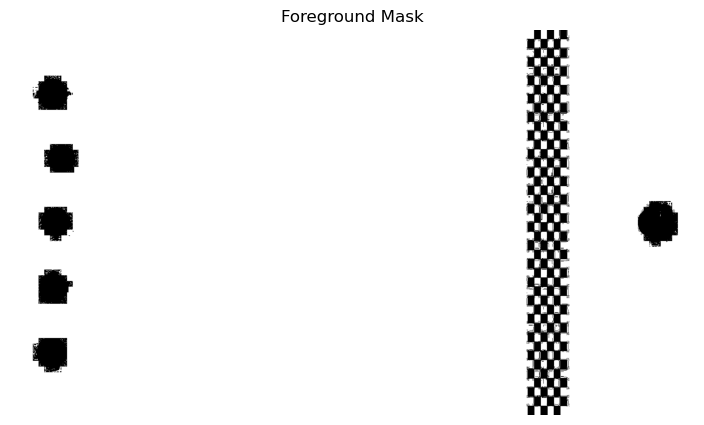

Number of contours found: 1


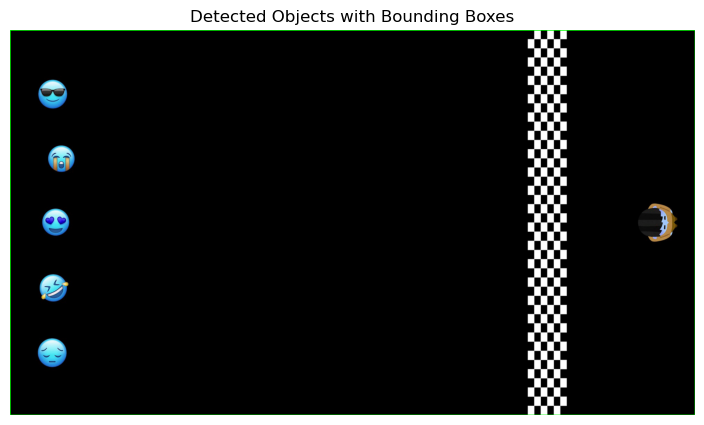

In [96]:
# Initialize the background subtractor with adjusted parameters
# back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=100, detectShadows=True)
back_sub = cv2.createBackgroundSubtractorMOG2()

# Path to the single image for experimentation
image_path = 'video_frames/frame_0002.jpg'  # Adjust the path to your image

# Read the image
frame = cv2.imread(image_path)

# Apply background subtraction
fg_mask = back_sub.apply(frame)

# Debug: Display the foreground mask
plt.figure(figsize=(10, 5))
plt.title('Foreground Mask')
plt.imshow(fg_mask, cmap='gray')
plt.axis('off')
plt.show()

# Find contours in the foreground mask
contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Debug: Print the number of contours found
print(f'Number of contours found: {len(contours)}')

# Draw bounding boxes around detected objects
for contour in contours:
    if cv2.contourArea(contour) > 1000:  # Adjust this threshold value to a lower value initially
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Debug: Check if bounding boxes are being drawn
plt.figure(figsize=(10, 5))
plt.title('Detected Objects with Bounding Boxes')
plt.imshow(frame)
plt.axis('off')
plt.show()

In [103]:
import cv2

# Initialize global variables
drawing = False  # True if the mouse is pressed
ix, iy = -1, -1  # Initial coordinates

# Mouse callback function
def draw_rectangle_with_mouse(event, x, y, flags, param):
    global ix, iy, drawing
    
    # If the left mouse button is pressed, record the starting coordinates
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    
    # If the mouse is moved, draw a rectangle if the left button is pressed
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            img_copy = img.copy()
            cv2.rectangle(img_copy, (ix, iy), (x, y), (0, 255, 0), 2)
            cv2.imshow('image', img_copy)
    
    # If the left mouse button is released, finalize the rectangle
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2)
        cv2.imshow('image', img)

# Load an image
image_path = 'video_frames/frame_0000.jpg'  # Adjust the path to your image
img = cv2.imread(image_path)

# Create a window and set the mouse callback function
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_rectangle_with_mouse)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:  # Press 'Esc' to exit
        break

cv2.destroyAllWindows()

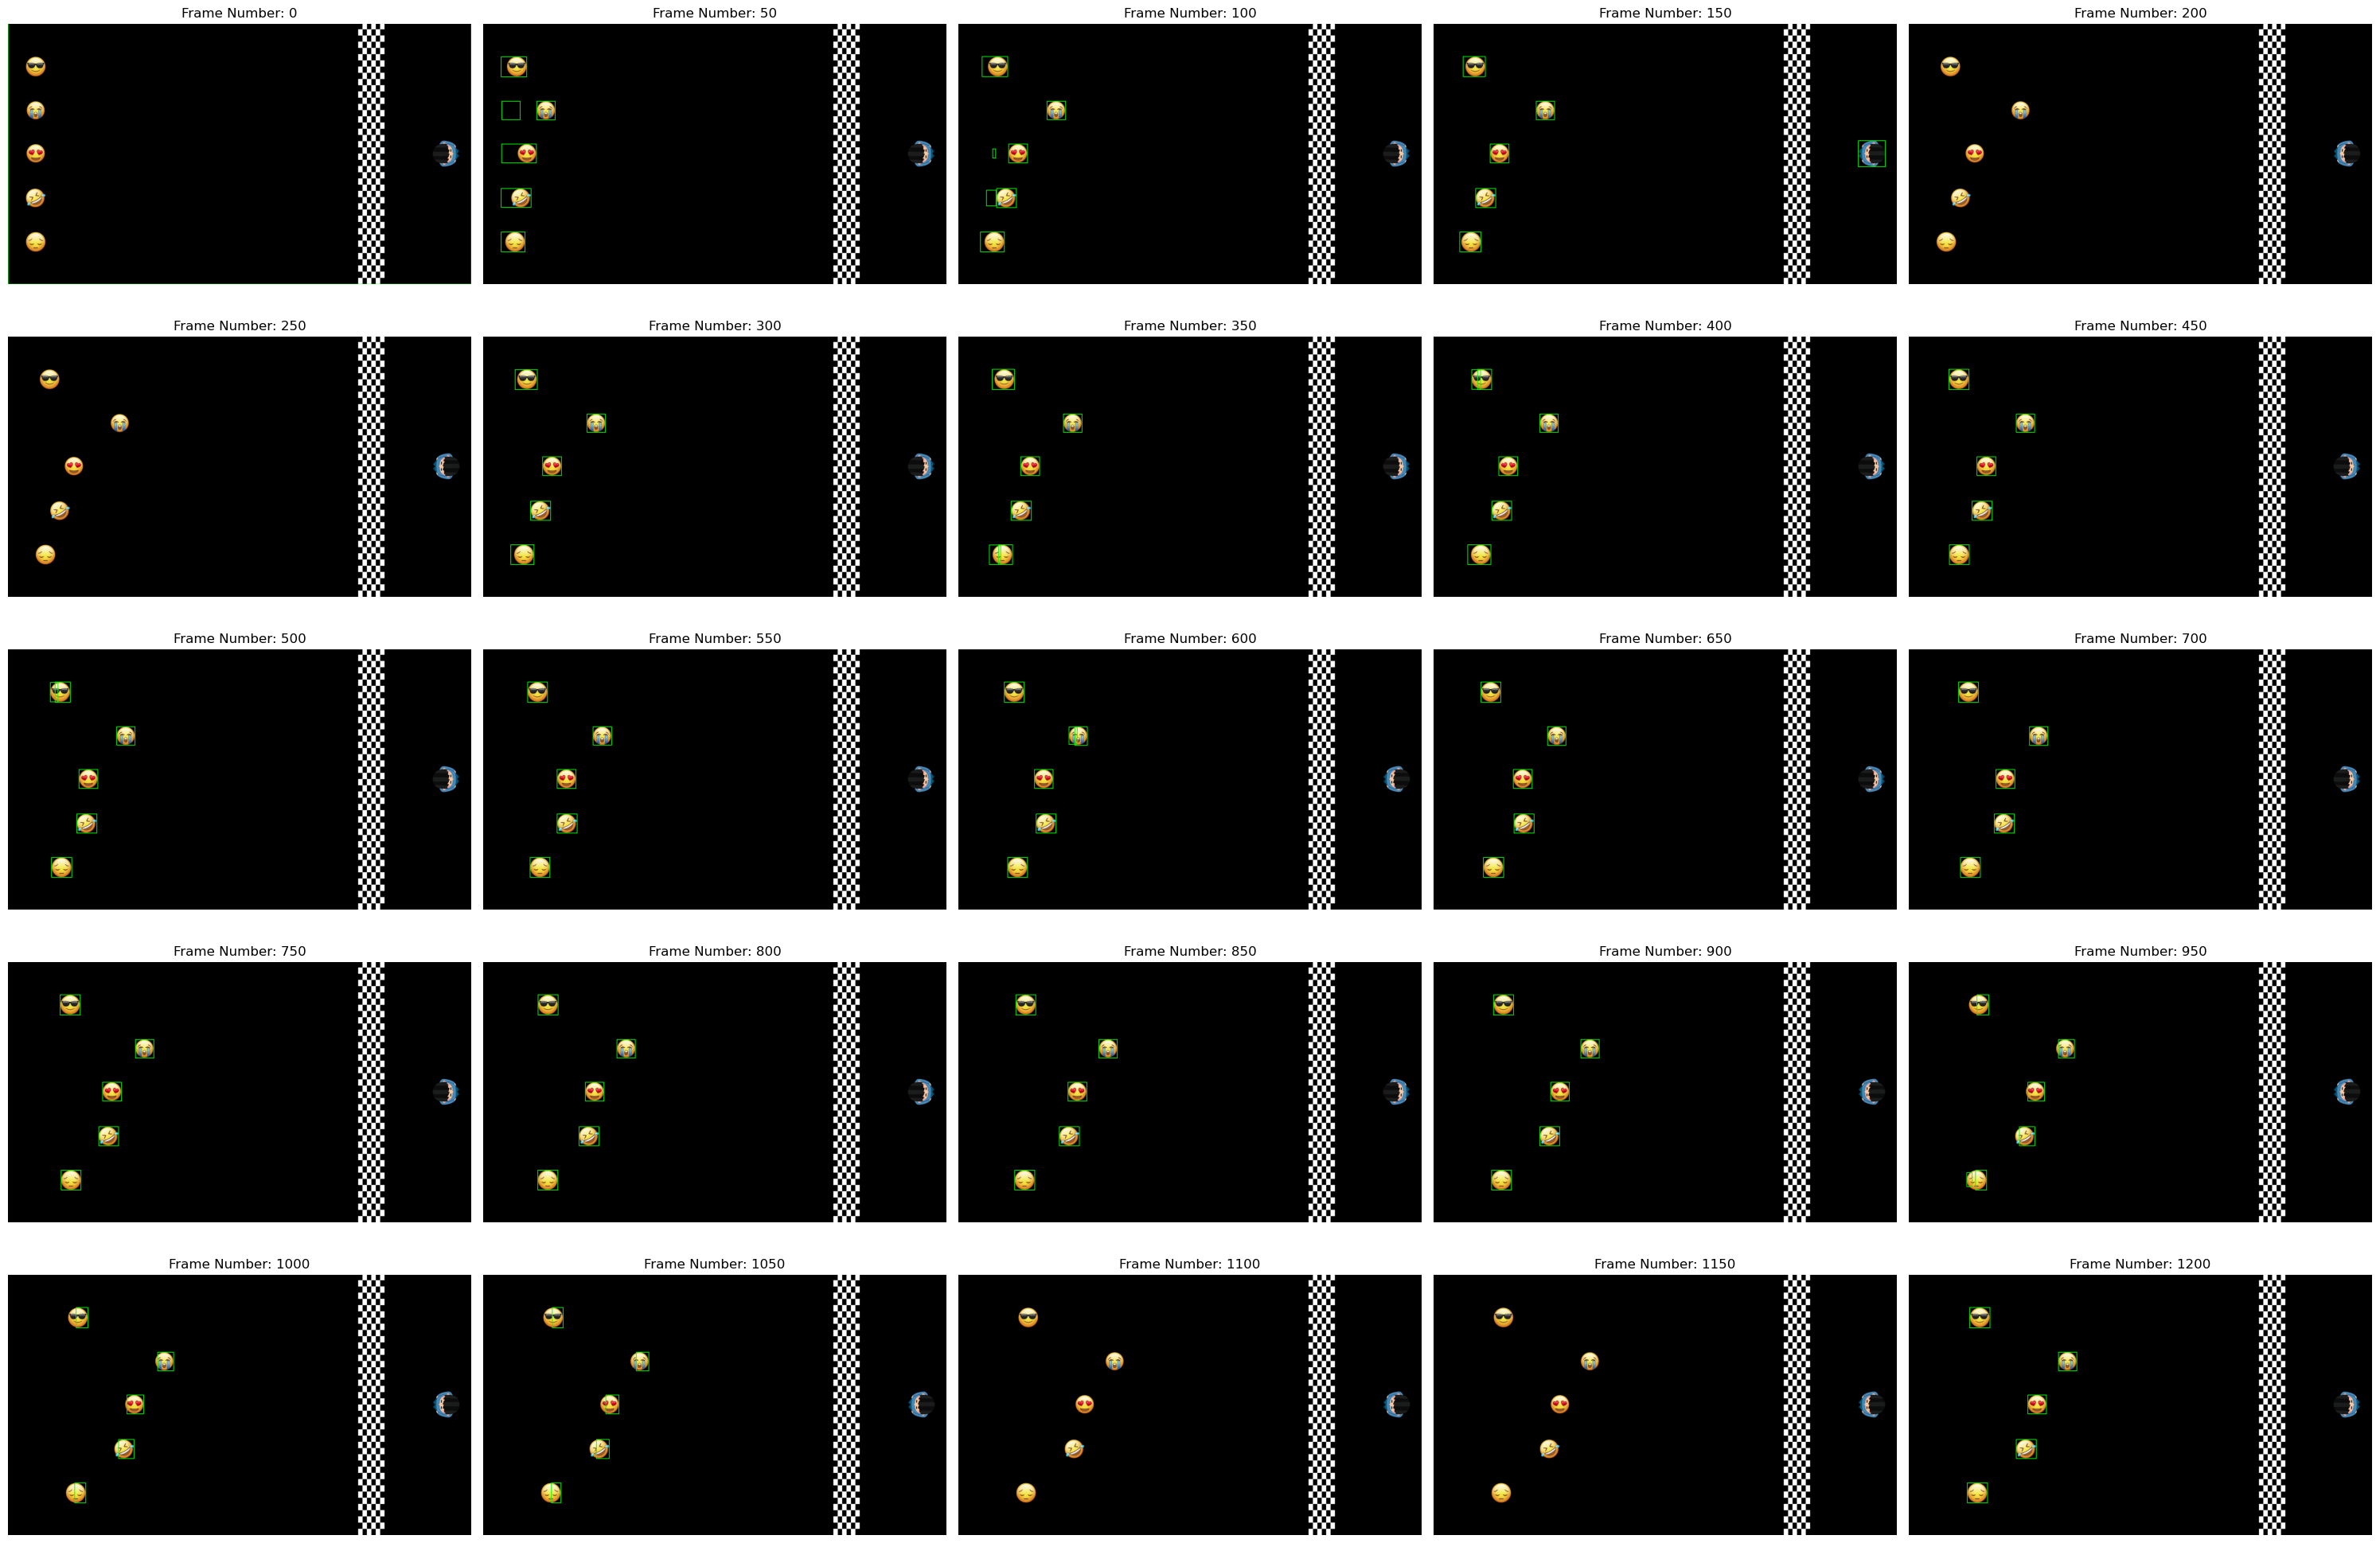

In [93]:
# Initialize the background subtractor
back_sub = cv2.createBackgroundSubtractorMOG2()

# Load video
cap = cv2.VideoCapture("training-video-001.mp4")
number_of_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

fig, axes = plt.subplots(5, 5, figsize=(30, 20))
axes = axes.ravel()

image_idx = 0
step_size = 5  # Process every 5th frame

for k in range(0, number_of_frames, step_size):
    ret, frame = cap.read()
    if not ret:
        break
    if k % 50 == 0:
        # Apply background subtraction
        fg_mask = back_sub.apply(frame)

        # Find contours in the foreground mask
        contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw bounding boxes around detected objects
        for contour in contours:
            if cv2.contourArea(contour) > 200:  # Adjust this threshold value
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the frame with bounding boxes
        axes[image_idx].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        axes[image_idx].axis("off")
        axes[image_idx].set_title(f"Frame Number: {k}")
        image_idx += 1
        if image_idx >= 25:
            break  # Stop if we have filled the grid

plt.tight_layout()
plt.show()
cap.release()

In [107]:
import cv2
import numpy as np

# Initialize the background subtractor
back_sub = cv2.createBackgroundSubtractorMOG2()

# Directory where frames are saved
input_dir = 'video_frames'
output_dir_processed = 'processed_frames'
if not os.path.exists(output_dir_processed):
    os.makedirs(output_dir_processed)

# Process each frame
for frame_filename in os.listdir(input_dir):
    frame_path = os.path.join(input_dir, frame_filename)
    frame = cv2.imread(frame_path)
    
    # Apply background subtraction
    fg_mask = back_sub.apply(frame)
    
    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw bounding boxes around detected objects
    for contour in contours:
        if cv2.contourArea(contour) > 200:  # Adjust this threshold value
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Save the processed frame
    processed_frame_path = os.path.join(output_dir_processed, frame_filename)
    cv2.imwrite(processed_frame_path, frame)

print('Processing complete. Processed frames saved.')

Processing complete. Processed frames saved.


In [15]:
import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(